# MO431A - Tarefa 1


Esse trabalho é um estudo sobre Single Value Decomposition (SVD). Essa técnina fatora uma matriz retangular no produto de três matrizes distintas.

Sendo $A$ uma matriz  retangular $mxn$ , seu SVD pode ser expresso como :

$$ A = USV^T $$

Onde
* $U$ é uma matriz ortogonal $mxm$.  
* $S$ é uma matriz diagonal $mxn$. 
* $V^T$ é uma matriz ortogonal  $nxn$. 

As matrizes $U$ e $V^T$ são compostas pelas colunas e linhas mais representativas da matriz $A$, respectivamente. Além disso, elas são ordenadas por grau de representatividade.

Os elemmentos da diagonal da matriz S, valores singulares, quantificam a representativa de cada uma dessas colunas ou linhas. 

Uma das principais aplicações da informação sobre a representatividade dessas colunas/vetores é a cosntrução de matrizes aproximadas de $A$. Isso é realizado selecioando um subconjunto de $r$ colunas ($U$) e linhas ($V$) mais relevantes que compõem o SVD da matriz $A$. Logo, a matrix apriximada de $A$ pode ser compreendida como a combinação linear dessas $r$ colunas/linhas do SVD.

Essa técnina pode ser aplicada em algoritmos de compressão de imagem. Onde uma matriz mxn, que precisa de uma espaço de armazenmeto $O(n*m)$, pode ser ser reprensentada por uma matriz com um custo de armazenmeto $O(k(n + m))$, onde $k$ é a quantidade de colunas/linhas utilizadas. 

Para realizar esse estudo será utilizado uma parte do banco de dados MNIST, que é composto por imagens de numeros escritos à mão. 

## 1) Lendo o arquivo *dados.npy* e salvando na matrix X

In [1]:
import numpy as np
import matplotlib.pyplot as pp

#1: Lendo o arquivo dados.npy
X = np.load('dados.npy')

## 2) Imprimindo os três primeiros dígitos de X

Text(0.5, 1.0, 'Digito 3')

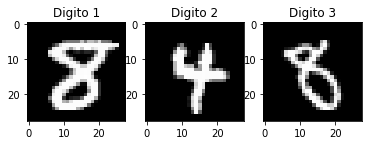

In [2]:
dig0 = np.reshape(X[0],(28,28))
dig1 = np.reshape(X[1],(28,28))
dig2 = np.reshape(X[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3")

## 3 . Fatoração svd da matriz X.

Existem duas formulções para o SVD de uma matriz: full_matrix e compacta. A primeira é a forma destrira anteriormente com matriz $U$ com dimensões $nxm$. A segunda forma aproveita o fato que as linhas de $S$ a partir da n-ésima são nulas. Sendo assim, as colunas de $U$ com indice maior que $n$ não agregam informação. Logo, a matriz $U$ pode ser representada como uma matriz $mxn$. 

 ### Dados com media 0

O algoritmo de SVD truncado, que vai ser analisado no item posterior,  gera o melhor o subespaço para reprensatar um determinado conjunto de dados. Todo subespaço deve conter o zero. Logo, para otimizar a performance do SVD é necessario assegurar que o zero pertence ao conjunto de dados em análise.

In [3]:
X_mean = np.mean(X, axis=0)
X_norm = X - np.tile(X_mean,(X.shape[0],1))

### Fatoração full_matrix

In [4]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=True)

print("dim U (Full_Matrix) =", U.shape)
print("dim S (Full_Matrix) =", S.shape)
print("dim VT (Full_Matrix) =", VT.shape)

dim U (Full_Matrix) = (10500, 10500)
dim S (Full_Matrix) = (784,)
dim VT (Full_Matrix) = (784, 784)


### Fatoração compacta

In [5]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=False)

print("dim U (Compacta) =", U.shape)
print("dim S (Compacta) =", S.shape)
print("dim VT (Compacta)  =", VT.shape)

dim U (Compacta) = (10500, 784)
dim S (Compacta) = (784,)
dim VT (Compacta)  = (784, 784)


## 4 SVD Truncado

### 4.1 Compute a matriz projetada. 

A matriz projetada pode ser compreendida como uma versão da matriz original reduzida a numero r de dimensões. Cada dado da matrix origial, cada linha/imagem no caso desse trabalho, é projetado nas  r(100) dimensões selecionas.


In [6]:
X_proj = U[:, :100] @ np.diag(S)[ :100, :100]
print("Dim (X_projeta)", X_proj.shape)


Dim (X_projeta) (10500, 100)


### 4.2 Compute a matriz reconstruida.

Como comentado anteriormente, o SVD pode ser utilizado para construção de matrizes aproximadas. A matrix reconstruida é gerada a partir de um subconjunto r(100) de bases.

In [7]:
X_rec = U[:, :100] @ np.diag(S)[ :100, :100] @ VT[:100, :]

print("Dim (X_reconstruida)", X_rec.shape) 

Dim (X_reconstruida) (10500, 784)


### Imprimindo dados reconstruidos 

Como esperado há perda de "informação" nos dados reconstruidos. Entranto, os numéros ainda podem ser diferenciados. Logo, é possivel observar como esse tipo de algoritmo pode ser utilizado na compressão dados. 

Text(0.5, 1.0, 'Digito 3 -  Recuperado')

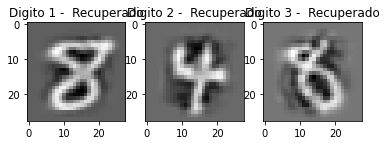

In [9]:
dig0 = np.reshape(X_rec[0],(28,28))
dig1 = np.reshape(X_rec[1],(28,28))
dig2 = np.reshape(X_rec[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1 -  Recuperado")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2 -  Recuperado")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3 -  Recuperado")

## 6 - 3 primeiros eigen-dígitos

A principal caracterica da matriz $V^t$ é que suas linhas representam as linhas mais representativas da matriz em análise. Como cada linha reprenta um dígito no conjunto de dados analisado, essas linhas são denomidas eigen-digitos (digitos caracteristos). Entretanto, elas  poderiam ter nomes diferentes em outros conjuntos de dados:  eigenfaces (rostos) ou eigendados.

Text(0.5, 1.0, 'Eigen-dígito 3')

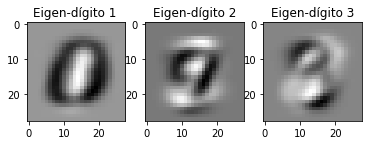

In [10]:
dig0 = np.reshape(VT[0],(28,28))
dig1 = np.reshape(VT[1],(28,28))
dig2 = np.reshape(VT[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Eigen-dígito 1 ")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Eigen-dígito 2")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Eigen-dígito 3")



## 7 Decidindo o número de dimensões

A quantidade de dimensões selecionadas é crucial na utilização do SVD para gerar matrizes reconstruidas. Essa escolha pode ser baseada em padrões para cada tipo de aplicação ou utilizando os valores singulares calculados pelo SVD. 

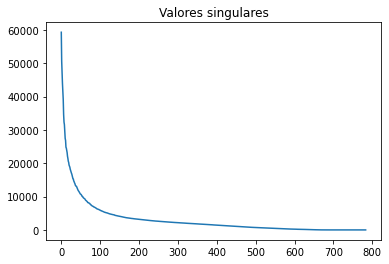

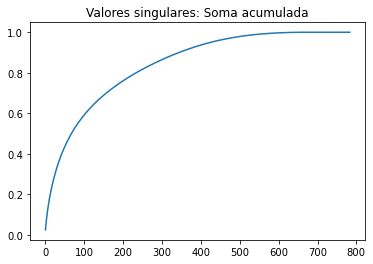

In [11]:
pp.figure(1)
pp.plot(S)
pp.title('Valores singulares')
pp.show()

pp.figure(2)
pp.plot(np.cumsum(S)/np.sum((S)))
pp.title('Valores singulares: Soma acumulada')
pp.show()

### 7.1 Quantas dimensões manter usando a regra de usar singular values maior que 1

In [12]:
S_1 = S[S >= 1]

In [13]:
print( "Dim (s > 1) = ", S_1.shape[0])

Dim (s > 1) =  671


### 7.2/7.3 Quantas dimensões manter para capturar 80%/95%  da variância dos dados

In [14]:
S_cum = np.cumsum(S)

S_80 = S_cum[S_cum < np.sum(S)*0.8]
S_95 = S_cum[S_cum < np.sum(S)*0.95]

print("Dim (80% Var) = ", S_80.shape[0])
print("Dim (95% Var) = ", S_95.shape[0])

Dim (80% Var) =  234
Dim (95% Var) =  425


In [15]:
print(S_cum[234]/np.sum(S))
print(S_cum[425]/np.sum(S))

0.800455711632801
0.9502576388383309


In [16]:
Dados_rec_80 = U[:, :234] @ np.diag(S)[ :234, :234] @ VT[:234, :]
Dados_rec_95 = U[:, :425] @ np.diag(S)[ :425, :425] @ VT[:425, :]

Text(0.5, 1.0, 'Digito aprox - 95%')

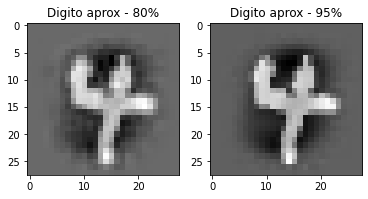

In [21]:
dig0 = np.reshape(Dados_rec_80[1],(28,28))
dig1 = np.reshape(Dados_rec_95[1],(28,28))


f, axarr = pp.subplots(1,2)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito aprox - 80%")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito aprox - 95%")
